# Cardio Disease 

## Import the Library

In [2]:
import pandas as pd
# For loading data as Pandas Dataframe
import numpy as np
# For performing Matrix Calculations
import seaborn as sns
# For visualizing statistical results
import scipy.stats as s
# For computing Statistical Functions
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
#For plotting Distributions
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# For evaluating the performance of the model

# Logistic Regression Library
from celluloid import Camera
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import os
import sys
module_path = os.path.abspath(os.path.join('.'))
sys.path.append(module_path)
from logistic_regression import LogisticRegression

# KNN Library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import sklearn.metrics as met

## Load the Data

In [3]:
data = pd.read_csv("data.csv")
data

,id,age_days,age_year,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,50.391781,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,55.419178,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,51.663014,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,48.282192,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,47.873973,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,52.712329,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,61.920548,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,52.235616,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,61.454795,1,163,72.0,135,80,1,2,0,0,0,1


## Exploratory Data Analysis (EDA)

In [4]:
data.columns

Index(['id', 'age_days', 'age_year', 'gender', 'height', 'weight', 'ap_hi',
       'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age_days     70000 non-null  int64  
 2   age_year     70000 non-null  float64
 3   gender       70000 non-null  int64  
 4   height       70000 non-null  int64  
 5   weight       70000 non-null  float64
 6   ap_hi        70000 non-null  int64  
 7   ap_lo        70000 non-null  int64  
 8   cholesterol  70000 non-null  int64  
 9   gluc         70000 non-null  int64  
 10  smoke        70000 non-null  int64  
 11  alco         70000 non-null  int64  
 12  active       70000 non-null  int64  
 13  cardio       70000 non-null  int64  
dtypes: float64(2), int64(12)
memory usage: 7.5 MB


In [6]:
data.describe()

,id,age_days,age_year,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,53.339358,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,6.759594,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,29.583562,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,48.394521,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,53.980822,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,58.430137,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,64.967123,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


### Data Cleaning

In [7]:
# Drop unnecessary columns
data.drop("id", axis=1, inplace = True)
data.drop("age_days", axis=1, inplace = True)

In [8]:
# Ubah satuan cm ke m
data_meter = data['height']/100
data_meter

0        1.68
1        1.56
2        1.65
3        1.69
4        1.56
         ... 
69995    1.68
69996    1.58
69997    1.83
69998    1.63
69999    1.70
Name: height, Length: 70000, dtype: float64

In [9]:
# kuadratkan
data_square = data_meter**2
data_square

0        2.8224
1        2.4336
2        2.7225
3        2.8561
4        2.4336
          ...  
69995    2.8224
69996    2.4964
69997    3.3489
69998    2.6569
69999    2.8900
Name: height, Length: 70000, dtype: float64

In [10]:
# Hitung BMI
BMI = data['weight']/(data_square)

In [11]:
BMI

0        21.967120
1        34.927679
2        23.507805
3        28.710479
4        23.011177
           ...    
69995    26.927438
69996    50.472681
69997    31.353579
69998    27.099251
69999    24.913495
Length: 70000, dtype: float64

In [12]:
data['BMI'] = BMI
data

,age_year,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,52.712329,2,168,76.0,120,80,1,1,1,0,1,0,26.927438
69996,61.920548,1,158,126.0,140,90,2,2,0,0,1,1,50.472681
69997,52.235616,2,183,105.0,180,90,3,1,0,1,0,1,31.353579
69998,61.454795,1,163,72.0,135,80,1,2,0,0,0,1,27.099251


In [13]:
data.drop("height", axis=1, inplace = True)
data.drop("weight", axis=1, inplace = True)

In [14]:
data.describe()

,age_year,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,53.339358,1.349571,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700,27.556513
std,6.759594,0.476838,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003,6.091511
min,29.583562,1.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.471784
25%,48.394521,1.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,23.875115
50%,53.980822,1.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,26.374068
75%,58.430137,2.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,30.222222
max,64.967123,2.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,298.666667


In [15]:
data = data[data.BMI <= 60]
data = data[data.BMI >= 10]

In [16]:
data = data[data.ap_hi.between(0,500)]

In [17]:
data = data[data.ap_lo.between(0,400)]

In [18]:
data.describe()

,age_year,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
count,68933.000000,68933.000000,68933.000000,68933.000000,68933.000000,68933.000000,68933.000000,68933.000000,68933.000000,68933.000000,68933.000000
mean,53.325203,1.348759,126.327434,81.332279,1.364513,1.225973,0.087868,0.053574,0.803273,0.494886,27.447936
std,6.761667,0.476581,17.742502,9.873051,0.678801,0.571918,0.283105,0.225176,0.397527,0.499977,5.211151
min,29.583562,1.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,10.726644
25%,48.375342,1.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,23.875115
50%,53.972603,1.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,26.346494
75%,58.419178,2.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,30.116213
max,64.967123,2.000000,401.000000,190.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,60.000000


In [19]:
data.columns

Index(['age_year', 'gender', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke',
       'alco', 'active', 'cardio', 'BMI'],
      dtype='object')

In [20]:
data.isnull().sum().sort_values(ascending=False)

age_year       0
gender         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
BMI            0
dtype: int64

0    34819
1    34114
Name: cardio, dtype: int64


Text(0.5, 1.0, 'Cardio Disease Classes')

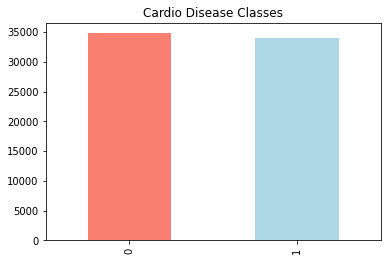

In [21]:
# Cek jumlah pembagian kelas ==> (0 = No cardio Disease, 1 = Cardio disease)
print(data.cardio.value_counts())
data['cardio'].value_counts().plot(kind='bar', color = ["salmon", "lightblue"]).set_title('Cardio Disease Classes')

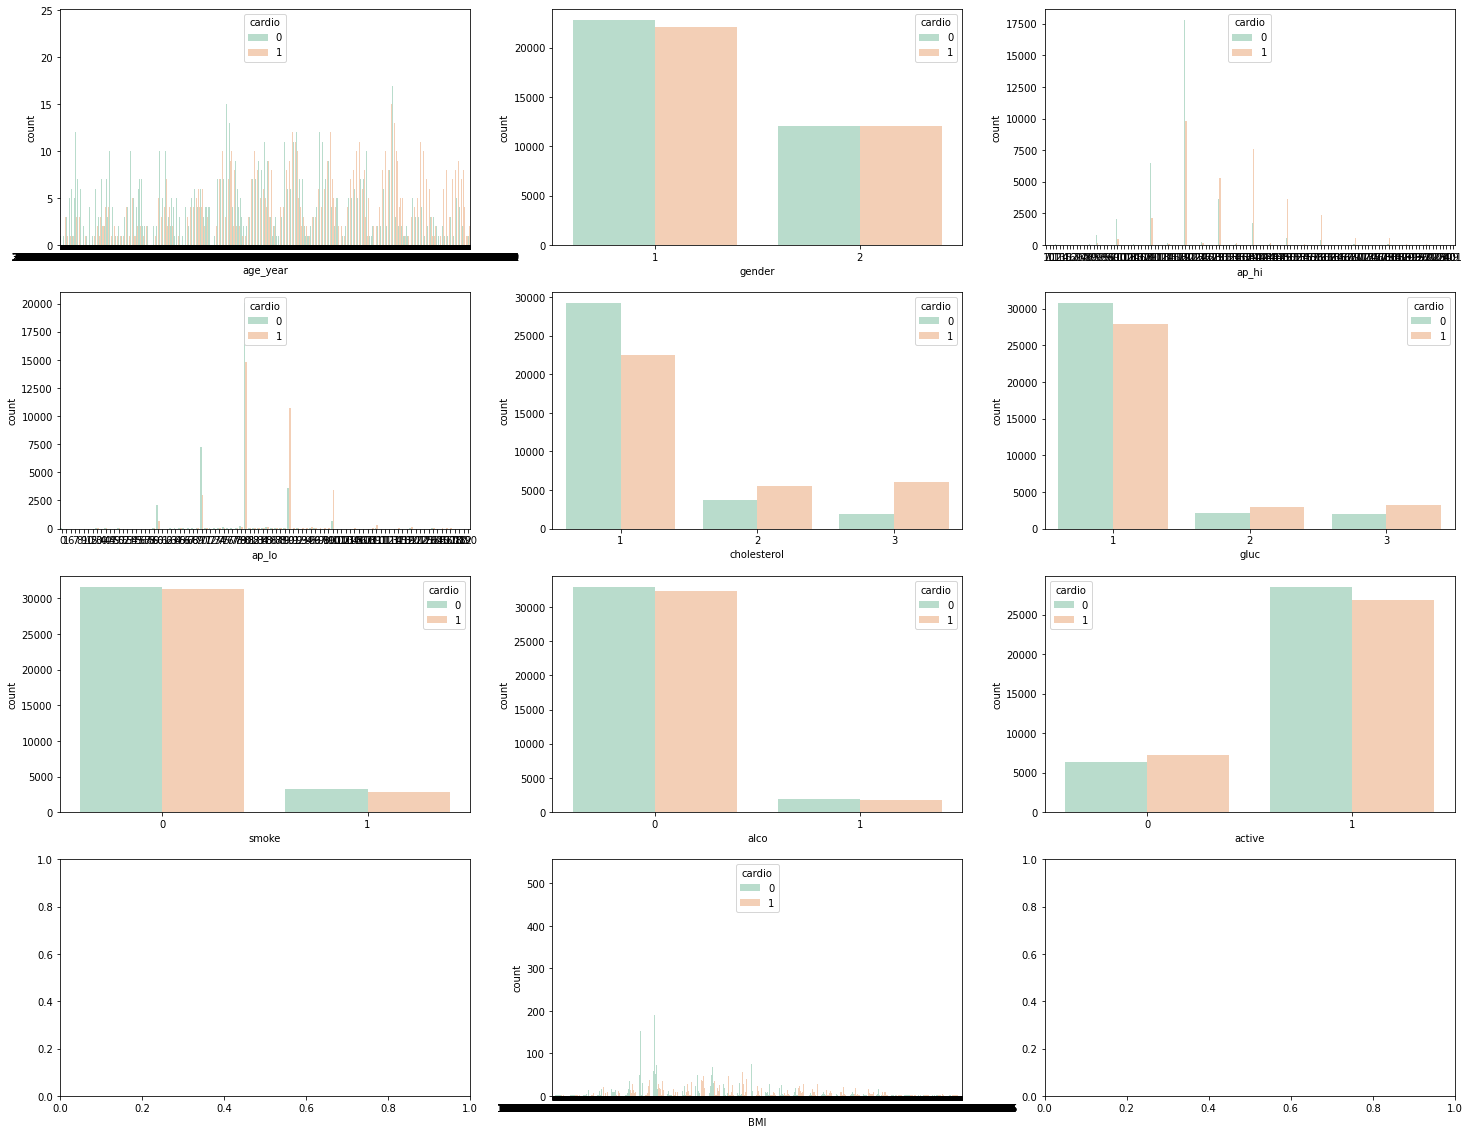

In [22]:
#visualisasi 11 fitur
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(25,20))
cat_feat = ['age_year', 'gender', 'ap_hi', 'ap_lo',
            'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio', 'BMI' ]

for idx, feature in enumerate(cat_feat):
    ax = axes[int(idx/3), idx%3]
    if feature != 'cardio':
        sns.countplot(x=feature, hue='cardio', data=data, ax=ax, palette='Pastel2')

## Feature Correlation

In [23]:
# Make a correlation matrix
corr_Data = data.corr()
corr_Data

,age_year,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
age_year,1.000000,-0.023007,0.197735,0.150953,0.155469,0.099210,-0.047720,-0.029015,-0.010433,0.239875,0.102590
gender,-0.023007,1.000000,0.057934,0.064985,-0.036649,-0.020897,0.338646,0.170875,0.005553,0.007759,-0.109982
ap_hi,0.197735,0.057934,1.000000,0.643311,0.185601,0.088373,0.027997,0.031394,0.000651,0.400659,0.250632
ap_lo,0.150953,0.064985,0.643311,1.000000,0.155455,0.076066,0.024557,0.042747,-0.001142,0.328747,0.232728
cholesterol,0.155469,-0.036649,0.185601,0.155455,1.000000,0.450847,0.009975,0.035767,0.008987,0.221419,0.172310
gluc,0.099210,-0.020897,0.088373,0.076066,0.450847,1.000000,-0.005619,0.011319,-0.007822,0.089755,0.119916
smoke,-0.047720,0.338646,0.027997,0.024557,0.009975,-0.005619,1.000000,0.339872,0.025597,-0.016247,-0.034048
alco,-0.029015,0.170875,0.031394,0.042747,0.035767,0.011319,0.339872,1.000000,0.025203,-0.007811,0.017581
active,-0.010433,0.005553,0.000651,-0.001142,0.008987,-0.007822,0.025597,0.025203,1.000000,-0.037433,-0.015467
cardio,0.239875,0.007759,0.400659,0.328747,0.221419,0.089755,-0.016247,-0.007811,-0.037433,1.000000,0.191062


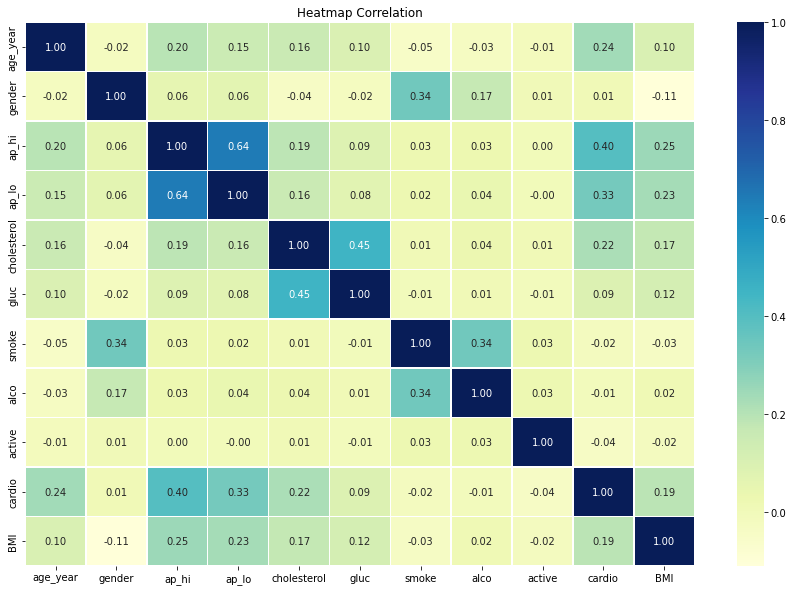

In [24]:
# Let's make our correlation matrix a bit prettier
corr_matrix = data.corr()
fig, ax = plt.subplots(figsize=(15, 10))

# Plot
ax = sns.heatmap(corr_matrix, 
                 annot=True, 
                 linewidths=0.5, 
                 fmt=".2f", 
                 cmap="YlGnBu", )

# Customization
plt.title("Heatmap Correlation")
plt.show()

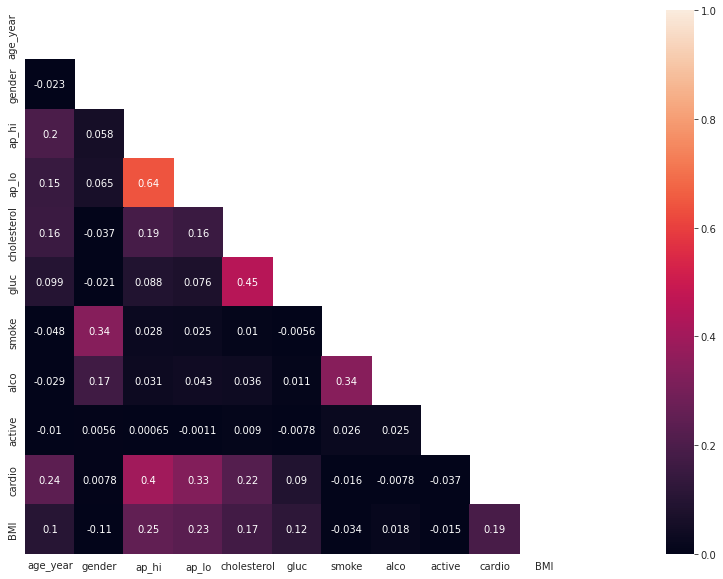

In [25]:
mask = np.zeros_like(data.corr())
mask[np.triu_indices_from(mask)] = True #True = generate a mask of lower triangle of matrix
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(35,10))
    sns.heatmap(data=corr_Data,vmin=0,vmax=1,mask=mask,square=True,annot=True)

In [26]:
strong_relation_features = pd.Series(corr_Data['cardio']).nlargest(n=6).iloc[1:] #take 3 features

In [27]:
strong_relation_features

ap_hi          0.400659
ap_lo          0.328747
age_year       0.239875
cholesterol    0.221419
BMI            0.191062
Name: cardio, dtype: float64

In [28]:
cardio = data['cardio']
data_copy = data[list(strong_relation_features.to_dict().keys())]

In [29]:
data_copy['cardio'] = cardio

<ipython-input-29-7f8cc3585d45>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_copy['cardio'] = cardio


In [30]:
data_copy

,ap_hi,ap_lo,age_year,cholesterol,BMI,cardio
0,110,80,50.391781,1,21.967120,0
1,140,90,55.419178,3,34.927679,1
2,130,70,51.663014,3,23.507805,1
3,150,100,48.282192,1,28.710479,1
4,100,60,47.873973,1,23.011177,0
...,...,...,...,...,...,...
69995,120,80,52.712329,1,26.927438,0
69996,140,90,61.920548,2,50.472681,1
69997,180,90,52.235616,3,31.353579,1
69998,135,80,61.454795,1,27.099251,1


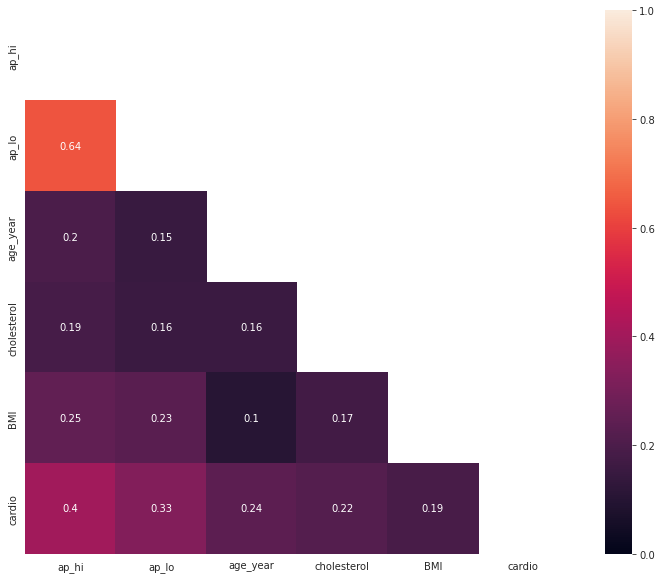

In [31]:
#Check heatmap again
mask = np.zeros_like(data_copy.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(13,10))
    sns.heatmap(data=data_copy.corr(),vmin=0,vmax=1,mask=mask,square=True,annot=True)

# Naive Bayes

In [32]:
data_copy_cov = np.array(data_copy[list(strong_relation_features.to_dict().keys())].cov())

In [33]:
data_copy_cov

array([[314.79638615, 112.69046491,  23.72208265,   2.23531261,
         23.17316496],
       [112.69046491,  97.477139  ,  10.07734316,   1.04183574,
         11.97385382],
       [ 23.72208265,  10.07734316,  45.7201373 ,   0.71357682,
          3.61487207],
       [  2.23531261,   1.04183574,   0.71357682,   0.46077109,
          0.60951796],
       [ 23.17316496,  11.97385382,   3.61487207,   0.60951796,
         27.1560955 ]])

In [34]:
data_copy_cov.shape

(5, 5)

In [35]:
#Calculate determinant from the matrix (ngecek matrix singular atau bukan)
data_copy_cov_det = np.linalg.det(data_copy_cov)

In [36]:
data_copy_cov_det

8547357.839168757

In [37]:
class0_data = data_copy[data_copy['cardio'] == 0]
class1_data = data_copy[data_copy['cardio'] == 1]

class0_training_data = class0_data.iloc[0:int(0.75*len(class0_data))]
class1_training_data = class1_data.iloc[0:int(0.75*len(class1_data))]

class0_cv_data = class0_data.iloc[int(0.75*len(class0_data)):]
class1_cv_data = class1_data.iloc[int(0.75*len(class1_data)):]

training_data = pd.concat([class0_training_data,class1_training_data]) #sum of training data from class 0 and 1
cv_data = pd.concat([class0_cv_data,class1_cv_data])

In [38]:
training_data

,ap_hi,ap_lo,age_year,cholesterol,BMI,cardio
0,110,80,50.391781,1,21.967120,0
4,100,60,47.873973,1,23.011177,0
5,120,80,60.038356,2,29.384676,0
6,130,80,60.583562,3,37.729725,0
8,110,70,48.405479,1,28.440955,0
...,...,...,...,...,...,...
52559,170,110,63.736986,2,26.128611,1
52561,150,90,51.934247,2,31.231410,1
52562,120,80,52.219178,2,25.864512,1
52563,120,80,44.178082,1,40.537521,1


In [39]:
cv_data

,ap_hi,ap_lo,age_year,cholesterol,BMI,cardio
52392,100,80,53.605479,1,24.023809,0
52393,140,75,53.789041,1,28.084332,0
52395,120,80,50.290411,1,26.233556,0
52397,120,80,52.060274,3,21.077195,0
52399,110,70,52.235616,1,28.344671,0
...,...,...,...,...,...,...
69993,130,90,53.969863,1,23.661439,1
69994,150,80,57.736986,1,29.384757,1
69996,140,90,61.920548,2,50.472681,1
69997,180,90,52.235616,3,31.353579,1


In [40]:
#Class = 1

mu_1 = np.array(training_data[training_data['cardio'] == 1].iloc[:,0:5].mean())
sigma_1 = np.array(training_data[training_data['cardio'] == 1].iloc[:,0:5].cov())

In [41]:
#Class = 0

mu_0 = np.array(training_data[training_data['cardio'] == 0].iloc[:,0:5].mean())
sigma_0 = np.array(training_data[training_data['cardio'] == 0].iloc[:,0:5].cov())

In [42]:
def predict_classes(data):
    
    p_xi_on_class1 = s.multivariate_normal.pdf(data,mu_1,sigma_1) #likelihood for all tumors in the cross validation data conditioned on malignant tumors
    
    p_xi_on_class0 = s.multivariate_normal.pdf(data,mu_0,sigma_0)
    
    p_class1_on_xi = p_xi_on_class1/(p_xi_on_class0 + p_xi_on_class1) #posterior probability
    
    return p_class1_on_xi > 0.5

In [43]:
predicted_classes = predict_classes(cv_data.iloc[:,0:5])

In [44]:
predicted_classes

array([False,  True, False, ...,  True,  True, False])

In [45]:
confusion_matrix(y_true=cv_data['cardio'],y_pred=predicted_classes)

array([[7148, 1557],
       [3484, 5045]])

In [46]:
print(classification_report(y_true=cv_data['cardio'],y_pred=predicted_classes))

              precision    recall  f1-score   support

           0       0.67      0.82      0.74      8705
           1       0.76      0.59      0.67      8529

    accuracy                           0.71     17234
   macro avg       0.72      0.71      0.70     17234
weighted avg       0.72      0.71      0.70     17234



# Logistic Regression

In [47]:
data_copy_LR = data_copy.copy()

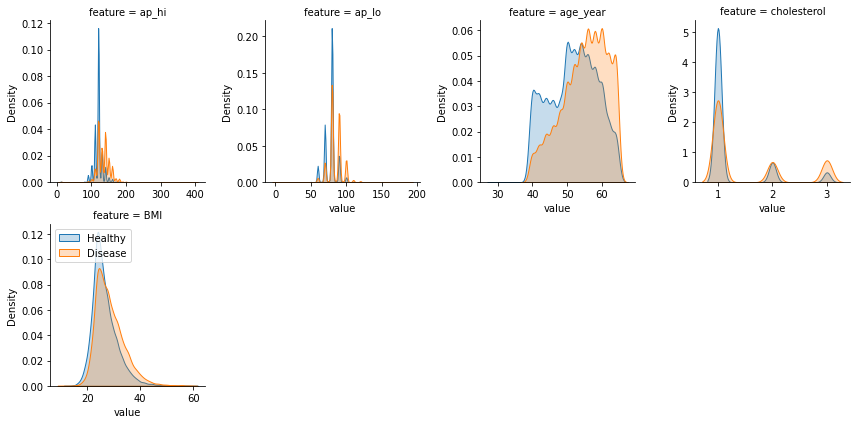

In [48]:
# plot SNS
long_df = pd.melt(data_copy_LR, data_copy_LR.columns[-1], data_copy_LR.columns[:-1], var_name="feature")

g = sns.FacetGrid(long_df, col="feature", hue="cardio", 
                sharex=False, sharey=False, col_wrap=4, )
                # palette="flare")
g.map(sns.kdeplot, "value", shade=True)
plt.legend(labels=["Healthy", "Disease"], loc="upper left")
plt.show()

In [49]:
# Split the dataset into train/test datasets.
targets = data_copy_LR.pop("cardio")  # remove the target label from the dataframe

# create the test:train split
x_train, x_test, y_train, y_test = train_test_split(
    data_copy_LR, targets, test_size=0.25, random_state=42
)

# Normalize the continuous features, ignore discrete (here treat age as continuous)
features_to_standardize = ["ap_hi", "ap_lo", "age_year", "cholesterol", "BMI"]

column_transformer = ColumnTransformer(
    [("scaler", StandardScaler(), features_to_standardize)], remainder="passthrough"
)
x_train = column_transformer.fit_transform(x_train)
x_test = column_transformer.transform(x_test)

In [50]:
# Create and train the model
model = LogisticRegression(n_input_features=x_train.shape[-1])
costs, accuracies, weights, bias = model.train(x_train, y_train,
                    epochs=5000,
                    learning_rate=0.01,
                    minibatch_size=None,
                    verbose=True)

# Predict the test labels
predictions = model.predict(x_test) 
accuracy = model.accuracy(predictions, y_test)
print(f"Model test prediction accuracy: {accuracy:0.2f}%")

Final model cost: 0.57              
Model test prediction accuracy: 72.73%


In [51]:
print(confusion_matrix(y_test,predictions.round()))
print('\n')
print(classification_report(y_test, predictions.round()))

[[6855 1904]
 [2795 5680]]


              precision    recall  f1-score   support

           0       0.71      0.78      0.74      8759
           1       0.75      0.67      0.71      8475

    accuracy                           0.73     17234
   macro avg       0.73      0.73      0.73     17234
weighted avg       0.73      0.73      0.73     17234



# KNN

In [52]:
data_copy_KNN = data_copy.copy()

In [53]:
data_copy_KNN

,ap_hi,ap_lo,age_year,cholesterol,BMI,cardio
0,110,80,50.391781,1,21.967120,0
1,140,90,55.419178,3,34.927679,1
2,130,70,51.663014,3,23.507805,1
3,150,100,48.282192,1,28.710479,1
4,100,60,47.873973,1,23.011177,0
...,...,...,...,...,...,...
69995,120,80,52.712329,1,26.927438,0
69996,140,90,61.920548,2,50.472681,1
69997,180,90,52.235616,3,31.353579,1
69998,135,80,61.454795,1,27.099251,1


In [54]:
#standardization the dataset by removing the mean and scaling to unit varience
standardScaler = StandardScaler()
scale_columns = ['ap_hi', 'age_year', 'cholesterol', 'BMI']
data_copy_KNN[scale_columns] = standardScaler.fit_transform(data_copy_KNN[scale_columns]) #secara otomatis mengikuti library scikit learn
data_copy_KNN

,ap_hi,ap_lo,age_year,cholesterol,BMI,cardio
0,-0.920251,80,-0.433834,-0.537000,-1.051755,0
1,0.770617,90,0.309685,2.409392,1.435345,1
2,0.206994,70,-0.245827,2.409392,-0.756102,1
3,1.334239,100,-0.745829,-0.537000,0.242279,1
4,-1.483873,60,-0.806202,-0.537000,-0.851403,0
...,...,...,...,...,...,...
69995,-0.356628,80,-0.090640,-0.537000,-0.099882,0
69996,0.770617,90,1.271197,0.936196,4.418393,1
69997,3.025106,90,-0.161143,2.409392,0.749483,1
69998,0.488805,80,1.202315,-0.537000,-0.066912,1


In [55]:
#SPLIT DATA
Y = data_copy_KNN['cardio']
X = data_copy_KNN.drop(['cardio'], axis = 1)
x_training, x_testing, y_training, y_testing = train_test_split(X, Y, test_size = 0.33, random_state = 0) #diambil 1/3 data

In [56]:
#KNN
knn = KNeighborsClassifier(n_neighbors=1) #SET K=1

In [57]:
knn.fit(x_training,y_training)

KNeighborsClassifier(n_neighbors=1)

In [58]:
prediction = knn.predict(x_testing)
prediction

array([0, 0, 0, ..., 1, 1, 1])

Text(91.68, 0.5, 'predicted class')

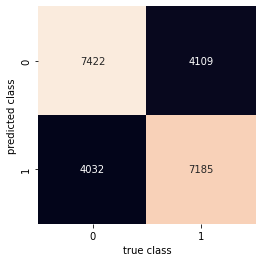

In [59]:
conmat=confusion_matrix(y_testing,prediction)
sns.heatmap(conmat.T, square=True, annot=True, fmt='d', cbar=False) 
plt.xlabel('true class') 
plt.ylabel('predicted class')

In [60]:
print(classification_report(y_testing,prediction))

              precision    recall  f1-score   support

           0       0.64      0.65      0.65     11454
           1       0.64      0.64      0.64     11294

    accuracy                           0.64     22748
   macro avg       0.64      0.64      0.64     22748
weighted avg       0.64      0.64      0.64     22748



In [61]:
#OPTIMALIZATION OF K VALUE

accuracy_rate = []
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,X,data_copy_KNN['cardio'],cv=10) #10 fold. ini cross validation. 70 rb dibagi jd 10 fold = 7 ribu data per fold
    accuracy_rate.append(score.mean())

Text(0, 0.5, 'Accuracy Rate')

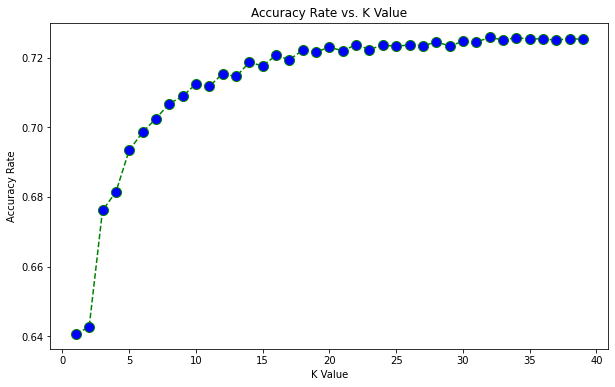

In [62]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy_rate,color='green', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy Rate')

Text(0, 0.5, 'Error Rate')

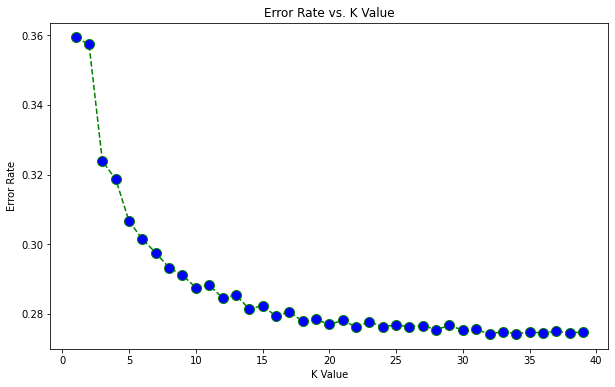

In [63]:
#ERROR SCORE OF EACH K VALUE
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,X,data_copy_KNN['cardio'],cv=10)
    error_rate.append(1-score.mean())

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='green', linestyle='dashed', marker='o',
        markerfacecolor='blue', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Error Rate')

In [64]:
#Untuk K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(x_training,y_training)
prediction = knn.predict(x_testing)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_testing,prediction))
print('\n')
print(classification_report(y_testing,prediction))
accuracyscore=met.accuracy_score(y_testing, prediction)*100
print('\n')
print('Accuracy score given for test data:',str(accuracyscore))

WITH K=1


[[7422 4032]
 [4109 7185]]


              precision    recall  f1-score   support

           0       0.64      0.65      0.65     11454
           1       0.64      0.64      0.64     11294

    accuracy                           0.64     22748
   macro avg       0.64      0.64      0.64     22748
weighted avg       0.64      0.64      0.64     22748



Accuracy score given for test data: 64.21223843854405


In [65]:
#Untuk K=40
knn = KNeighborsClassifier(n_neighbors=40)

knn.fit(x_training,y_training)
prediction = knn.predict(x_testing)

print('K=40')
print('\n')
print(confusion_matrix(y_testing,prediction))
print('\n')
print(classification_report(y_testing,prediction))
accuracyscore=met.accuracy_score(y_testing, prediction)*100
print('\n')
print('Accuracy score given for test data:',str(accuracyscore))

K=40


[[8974 2480]
 [3733 7561]]


              precision    recall  f1-score   support

           0       0.71      0.78      0.74     11454
           1       0.75      0.67      0.71     11294

    accuracy                           0.73     22748
   macro avg       0.73      0.73      0.73     22748
weighted avg       0.73      0.73      0.73     22748



Accuracy score given for test data: 72.68770880956568


# Hypothesis Testing

In [66]:
data_copy_HT = data_copy.copy()

In [67]:
data_copy_HT

,ap_hi,ap_lo,age_year,cholesterol,BMI,cardio
0,110,80,50.391781,1,21.967120,0
1,140,90,55.419178,3,34.927679,1
2,130,70,51.663014,3,23.507805,1
3,150,100,48.282192,1,28.710479,1
4,100,60,47.873973,1,23.011177,0
...,...,...,...,...,...,...
69995,120,80,52.712329,1,26.927438,0
69996,140,90,61.920548,2,50.472681,1
69997,180,90,52.235616,3,31.353579,1
69998,135,80,61.454795,1,27.099251,1


In [68]:
data_norm = data_copy_HT[data_copy_HT['cardio'] == 0]
data_abnorm = data_copy_HT[data_copy_HT['cardio'] == 1]

norm_training_data = data_norm.iloc[0:int(0.75*len(data_norm))] #ambil array 0 sampai 75% nya
abnorm_training_data = data_abnorm.iloc[0:int(0.75*len(data_abnorm))]

norm_cv_data = data_norm.iloc[int(0.75*len(data_norm)):]
abnorm_cv_data = data_abnorm.iloc[int(0.75*len(data_abnorm)):]

training_data = pd.concat([norm_training_data,abnorm_training_data]) #sum of training data from class 0 and 1
cv_data = pd.concat([norm_cv_data,abnorm_cv_data])

In [69]:
training_data

,ap_hi,ap_lo,age_year,cholesterol,BMI,cardio
0,110,80,50.391781,1,21.967120,0
4,100,60,47.873973,1,23.011177,0
5,120,80,60.038356,2,29.384676,0
6,130,80,60.583562,3,37.729725,0
8,110,70,48.405479,1,28.440955,0
...,...,...,...,...,...,...
52559,170,110,63.736986,2,26.128611,1
52561,150,90,51.934247,2,31.231410,1
52562,120,80,52.219178,2,25.864512,1
52563,120,80,44.178082,1,40.537521,1


In [70]:
cv_data

,ap_hi,ap_lo,age_year,cholesterol,BMI,cardio
52392,100,80,53.605479,1,24.023809,0
52393,140,75,53.789041,1,28.084332,0
52395,120,80,50.290411,1,26.233556,0
52397,120,80,52.060274,3,21.077195,0
52399,110,70,52.235616,1,28.344671,0
...,...,...,...,...,...,...
69993,130,90,53.969863,1,23.661439,1
69994,150,80,57.736986,1,29.384757,1
69996,140,90,61.920548,2,50.472681,1
69997,180,90,52.235616,3,31.353579,1


In [71]:
data_columns = data_copy_HT.columns

In [72]:
data_columns

Index(['ap_hi', 'ap_lo', 'age_year', 'cholesterol', 'BMI', 'cardio'], dtype='object')

In [73]:
training_data_fitur = training_data.copy()
training_data_fitur.drop(labels=data_columns[5],axis=1,inplace=True)

In [74]:
data_fitur_columns = training_data_fitur.columns
data_fitur_columns

Index(['ap_hi', 'ap_lo', 'age_year', 'cholesterol', 'BMI'], dtype='object')

In [75]:
training_data_melt = training_data.melt(id_vars='cardio')

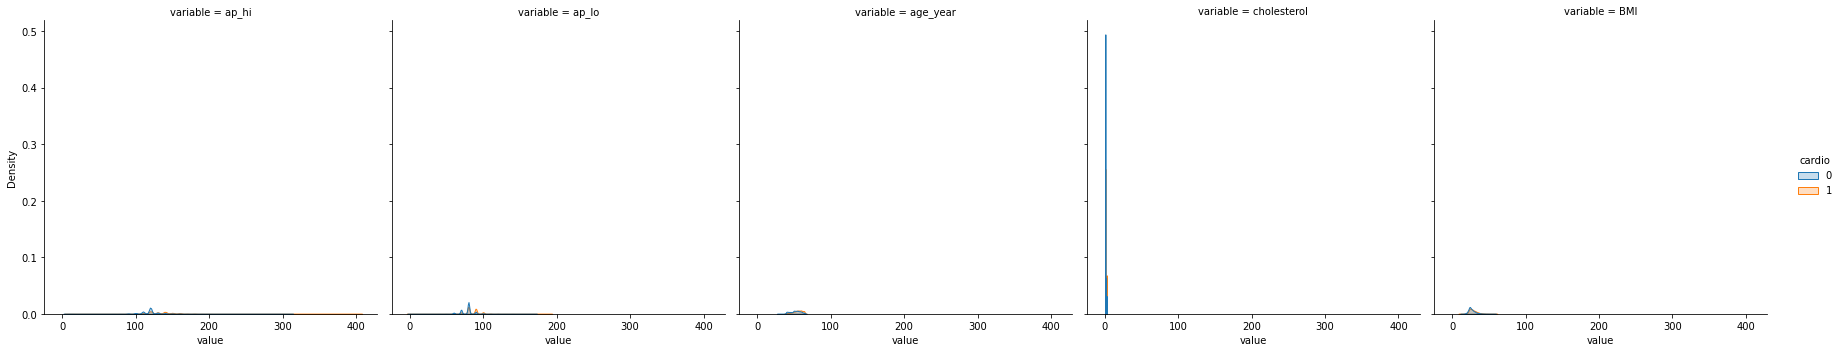

In [76]:
sns.displot(
    data=training_data_melt, 
    x='value', 
    hue='cardio', 
    kind='kde', 
    fill=True,
    col='variable'
)

In [77]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(10,50))

normalized_training_data = scaler.fit_transform(training_data_fitur)

print(normalized_training_data)

[[20.45685279 26.84210526 33.56134636 10.         19.2140405 ]
 [19.44162437 22.63157895 30.71040794 10.         20.06987437]
 [21.47208122 26.84210526 44.48425624 30.         25.2943575 ]
 ...
 [21.47208122 26.84210526 35.63052583 30.         22.40880989]
 [21.47208122 26.84210526 26.52551574 10.         34.43656469]
 [22.48730964 28.94736842 36.88692415 30.         22.73265843]]


In [78]:
normalized_df_training_data_features = pd.DataFrame(normalized_training_data, columns=data_fitur_columns)

print(normalized_df_training_data_features)

           ap_hi      ap_lo   age_year  cholesterol        BMI
0      20.456853  26.842105  33.561346         10.0  19.214041
1      19.441624  22.631579  30.710408         10.0  20.069874
2      21.472081  26.842105  44.484256         30.0  25.294357
3      22.487310  26.842105  45.101598         50.0  32.134959
4      20.456853  24.736842  31.312238         10.0  24.520771
...          ...        ...        ...          ...        ...
51694  26.548223  33.157895  48.672251         30.0  22.625297
51695  24.517766  28.947368  35.307895         30.0  26.808162
51696  21.472081  26.842105  35.630526         30.0  22.408810
51697  21.472081  26.842105  26.525516         10.0  34.436565
51698  22.487310  28.947368  36.886924         30.0  22.732658

[51699 rows x 5 columns]


In [79]:
normalized_df_training_data_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51699 entries, 0 to 51698
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ap_hi        51699 non-null  float64
 1   ap_lo        51699 non-null  float64
 2   age_year     51699 non-null  float64
 3   cholesterol  51699 non-null  float64
 4   BMI          51699 non-null  float64
dtypes: float64(5)
memory usage: 2.0 MB


In [80]:
normalized_df_training_data_features['cardio'] = cardio

In [81]:
normalized_df_training_data_features_melt = normalized_df_training_data_features.melt(id_vars='cardio')

In [82]:
normalized_df_training_data_features_melt

,cardio,variable,value
0,0.0,ap_hi,20.456853
1,1.0,ap_hi,19.441624
2,1.0,ap_hi,21.472081
3,1.0,ap_hi,22.487310
4,0.0,ap_hi,20.456853
...,...,...,...
258490,1.0,BMI,22.625297
258491,1.0,BMI,26.808162
258492,0.0,BMI,22.408810
258493,1.0,BMI,34.436565


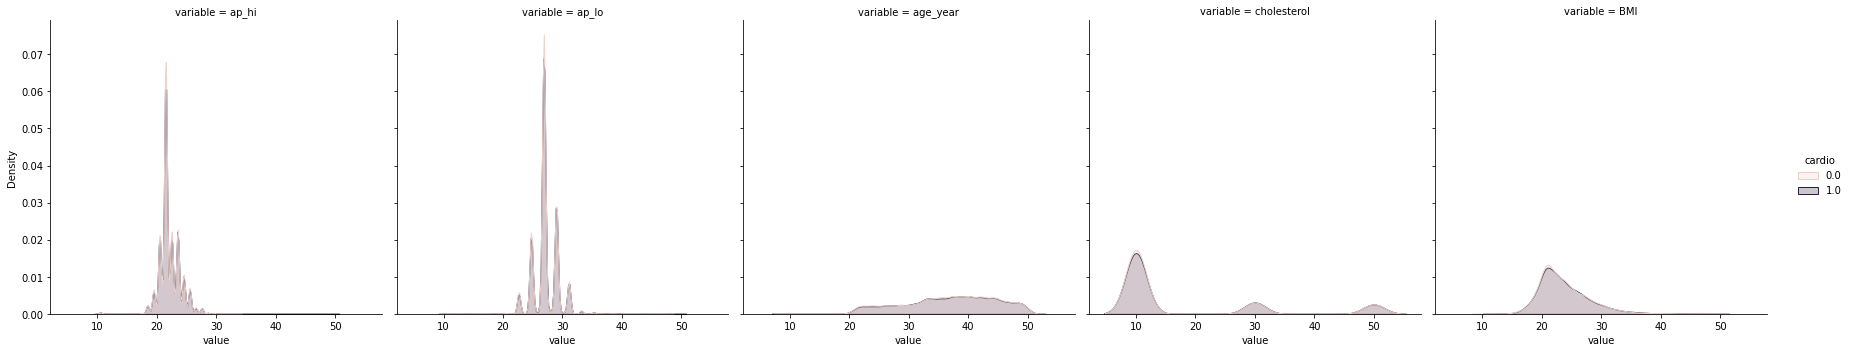

In [83]:
sns.displot(
    data=normalized_df_training_data_features_melt, 
    x='value', 
    hue='cardio', 
    kind='kde', 
    fill=True,
    col='variable'
)

In [84]:
def plot_feature_distplot(data,feature):
    
    data_mean_normal = 0
    data_mean_abnormal = 0
    data_std_normal = 0
    data_std_abnormal = 0

    data_mean_abnormal = np.mean(data[data['cardio'] == 1][feature])
    data_std_abnormal = np.std(data[data['cardio'] == 1][feature])
    data_mean_normal = np.mean(data[data['cardio'] == 0][feature])
    data_std_normal = np.std(data[data['cardio'] == 0][feature])

    pdf_abnormal = s.multivariate_normal.pdf(data[data['cardio'] == 1][feature],data_mean_abnormal,data_std_abnormal)
    pdf_normal = s.multivariate_normal.pdf(data[data['cardio'] == 0][feature],data_mean_normal,data_std_normal)

    sns.distplot(pdf_abnormal, hist=False, label='1')
    sns.distplot(pdf_normal, hist=False,  label='0')
    plt.xlabel(feature)
    plt.ylabel("probability")

    plt.legend()
    plt.show()

    return pdf_normal, pdf_abnormal

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


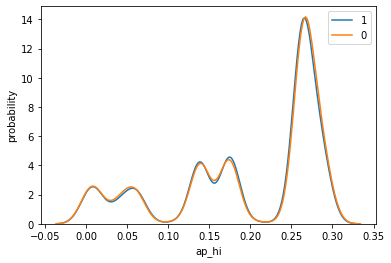

In [85]:
pdf_apHi_0, pdf_apHi_1 = plot_feature_distplot(normalized_df_training_data_features,'ap_hi')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


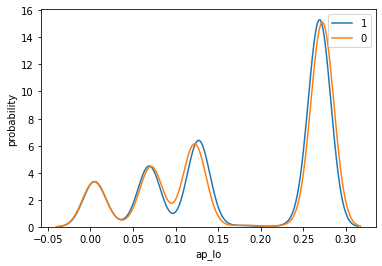

In [86]:
pdf_apLo_0, pdf_apLo_1 = plot_feature_distplot(normalized_df_training_data_features,'ap_lo')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


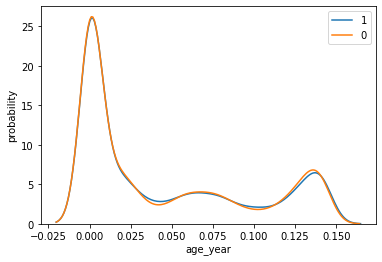

In [87]:
pdf_age_0, pdf_age_1 = plot_feature_distplot(normalized_df_training_data_features,'age_year')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


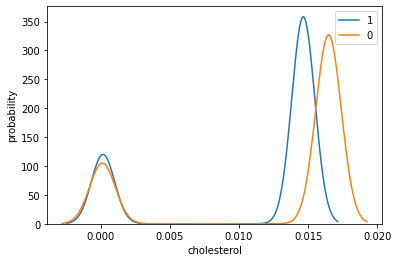

In [88]:
pdf_chol_0, pdf_chol_1 = plot_feature_distplot(normalized_df_training_data_features,'cholesterol')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


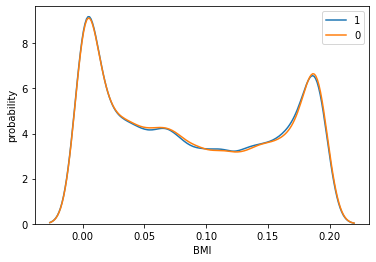

In [89]:
pdf_bmi_0, pdf_bmi_1 = plot_feature_distplot(normalized_df_training_data_features,'BMI')

In [90]:
mean_apHI_normal = np.mean(training_data[training_data['cardio'] == 0]['ap_hi'])
mean_apLO_normal = np.mean(training_data[training_data['cardio'] == 0]['ap_lo'])
mean_age_normal = np.mean(training_data[training_data['cardio'] == 0]['age_year'])
mean_chol_normal = np.mean(training_data[training_data['cardio'] == 0]['cholesterol'])
mean_bmi_normal = np.mean(training_data[training_data['cardio'] == 0]['BMI'])
std_apHI_normal = np.std(training_data[training_data['cardio'] == 0]['ap_hi'])
std_apLO_normal = np.std(training_data[training_data['cardio'] == 0]['ap_lo'])
std_age_normal = np.std(training_data[training_data['cardio'] == 0]['age_year'])
std_chol_normal = np.std(training_data[training_data['cardio'] == 0]['cholesterol'])
std_bmi_normal = np.std(training_data[training_data['cardio'] == 0]['BMI'])

In [91]:
mean_apHI_abnorm = np.mean(training_data[training_data['cardio'] == 0]['ap_hi'])
mean_apLO_abnorm = np.mean(training_data[training_data['cardio'] == 0]['ap_lo'])
mean_age_abnorm = np.mean(training_data[training_data['cardio'] == 0]['age_year'])
mean_chol_abnorm = np.mean(training_data[training_data['cardio'] == 0]['cholesterol'])
mean_bmi_abnorm = np.mean(training_data[training_data['cardio'] == 0]['BMI'])
std_apHI_abnorm = np.std(training_data[training_data['cardio'] == 0]['ap_hi'])
std_apLO_abnorm = np.std(training_data[training_data['cardio'] == 0]['ap_lo'])
std_age_abnorm = np.std(training_data[training_data['cardio'] == 0]['age_year'])
std_chol_abnorm = np.std(training_data[training_data['cardio'] == 0]['cholesterol'])
std_bmi_abnorm = np.std(training_data[training_data['cardio'] == 0]['BMI'])

In [92]:
import math

In [93]:
#alpha beta
def alpha_beta(threshold, sigma_1, mean_0, sigma_0, mean_1):
    
    total_alpha = 0
    total_beta = 0

    for i in range(threshold, 101):
        alpha_value = ((1/(math.sqrt(2*3.14)*sigma_1))*math.exp((-(i-mean_1)**2)/2*(sigma_1**2)))
        total_alpha = total_alpha + alpha_value

    for i in range(1, threshold+1):
        beta_value = ((1/(math.sqrt(2*3.14)*sigma_0))*math.exp((-(i-mean_0)**2)/2*(sigma_0**2)))
        total_beta = total_beta + beta_value    
        
    return total_alpha, total_beta

In [94]:
#setting double threshold

def set_threshold(total_alpha, total_beta):
    t1 = (1-total_beta)/total_alpha
    t2 = total_beta/(1-total_alpha)

    return t1, t2

In [95]:
#probability ratio each feature
def likelihood(pdf_0, pdf_1):
    likelihood = pdf_0/pdf_1

    return likelihood

In [96]:
def hypothesis_testing (likelihood, t1, t2):
    H1 = likelihood >= t1
    H0 = likelihood <= t2
    need_moredata = np.bitwise_and(likelihood > t2, likelihood < t1)
    return H1, H0, need_moredata

In [97]:
from collections import Counter

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


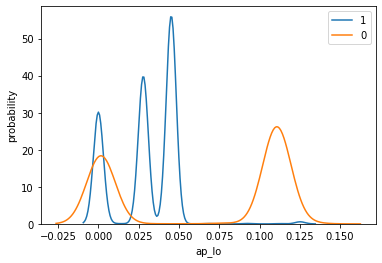

In [104]:
#feat 2 : ap_lo
alpha_apLO, beta_apLO = alpha_beta(5, std_apLO_abnorm, mean_apHI_normal, std_apLO_normal, mean_apLO_abnorm)
t1_apLO, t2_apLO = set_threshold(alpha_apLO, beta_apLO)
pdf_apLO_0, pdf_apLO_1 = plot_feature_distplot(cv_data, 'ap_lo')
pdf_apLO_0 = pdf_apLO_0[176:] #remove first 176 elements
likelihood_apLO = likelihood(pdf_apLO_0, pdf_apLO_1)

In [105]:
H1_apLO, H0_apLO, need_moredata_apLO = hypothesis_testing(likelihood_apLO, t1_apLO, t2_apLO)

In [106]:
Counter(H1_apLO)

Counter({False: 6759, True: 1770})

In [107]:
Counter(H0_apLO)

Counter({False: 8529})

<ipython-input-94-9587c6cbe56b>:4: RuntimeWarning: divide by zero encountered in double_scalars
  t1 = (1-total_beta)/total_alpha
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


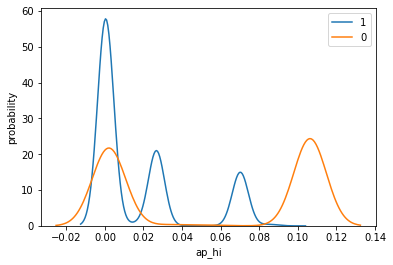

In [108]:
#feat 1 : ap_hi
alpha_apHI, beta_apHI = alpha_beta(5, std_apHI_abnorm, mean_apHI_normal, std_apHI_normal, mean_apHI_abnorm)
t1_apHI, t2_apHI = set_threshold(alpha_apHI, beta_apHI)
pdf_apHI_0, pdf_apHI_1 = plot_feature_distplot(cv_data, 'ap_hi')
pdf_apHI_0 = pdf_apHI_0[176:] #remove first 176 elements
likelihood_apHI = likelihood(pdf_apHI_0, pdf_apHI_1)

In [109]:
H1_apHI, H0_apHI, need_moredata_apHI = hypothesis_testing(likelihood_apHI, t1_apHI, t2_apHI)

In [110]:
Counter(H1_apHI)

Counter({False: 8529})

In [111]:
Counter(H0_apHI)

Counter({False: 8529})

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


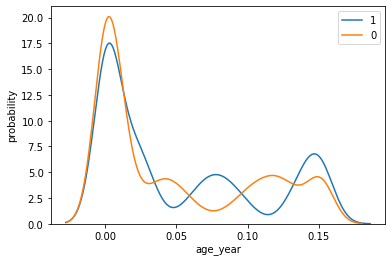

In [112]:
#feat 3 : age_year
alpha_age, beta_age = alpha_beta(5, std_age_abnorm, mean_age_normal, std_age_normal, mean_age_abnorm)
t1_age, t2_age = set_threshold(alpha_age, beta_age)
pdf_age_0, pdf_age_1 = plot_feature_distplot(cv_data, 'age_year')
pdf_age_0 = pdf_age_0[176:] #remove first 176 elements
likelihood_age = likelihood(pdf_age_0, pdf_age_1)

In [113]:
H1_age, H0_age, need_moredata_age = hypothesis_testing(likelihood_age, t1_age, t2_age)

In [114]:
Counter(H1_age)

Counter({False: 7356, True: 1173})

In [115]:
Counter(H0_age)

Counter({False: 8529})

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


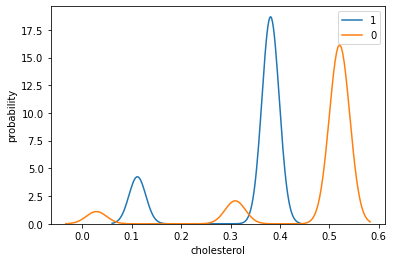

In [116]:
#feat 4 : cholesterol
alpha_chol, beta_chol = alpha_beta(5, std_chol_abnorm, mean_chol_normal, std_chol_normal, mean_chol_abnorm)
t1_chol, t2_chol = set_threshold(alpha_chol, beta_chol)
pdf_chol_0, pdf_chol_1 = plot_feature_distplot(cv_data, 'cholesterol')
pdf_chol_0 = pdf_chol_0[176:] #remove first 176 elements
likelihood_chol = likelihood(pdf_chol_0, pdf_chol_1)

In [117]:
H1_chol, H0_chol, need_moredata_chol = hypothesis_testing(likelihood_chol, t1_chol, t2_chol)

In [118]:
Counter(H1_chol)

Counter({True: 8529})

In [119]:
Counter(H0_chol)

Counter({False: 1457, True: 7072})

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


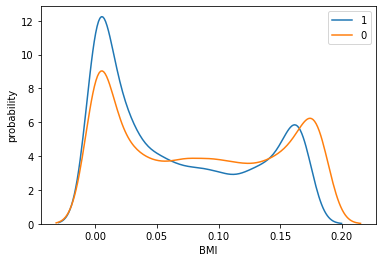

In [120]:
#feat 5 : BMI
alpha_bmi, beta_bmi = alpha_beta(5, std_bmi_abnorm, mean_bmi_normal, std_bmi_normal, mean_bmi_abnorm)
t1_bmi, t2_bmi = set_threshold(alpha_bmi, beta_bmi)
pdf_bmi_0, pdf_bmi_1 = plot_feature_distplot(cv_data, 'BMI')
pdf_bmi_0 = pdf_bmi_0[176:] #remove first 176 elements
likelihood_bmi = likelihood(pdf_bmi_0, pdf_bmi_1)

In [121]:
H1_bmi, H0_bmi, need_moredata_bmi = hypothesis_testing(likelihood_bmi, t1_bmi, t2_bmi)

In [122]:
Counter(H1_bmi)

Counter({True: 936, False: 7593})

In [123]:
Counter(H0_bmi)

Counter({False: 8529})